In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [39]:
dataset = pd.read_csv('StudentsPerformance.csv')

In [40]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [41]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [48]:
dataset['Percentage'] = (dataset['math score']+dataset['reading score']+dataset['writing score'])/3
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Percentage                   1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [38]:
'''dataset['gender'] = dataset['gender'].apply({'male':0, 'female':1}.get)
dataset'''

"dataset['gender'] = dataset['gender'].apply({'male':0, 'female':1}.get)\ndataset"

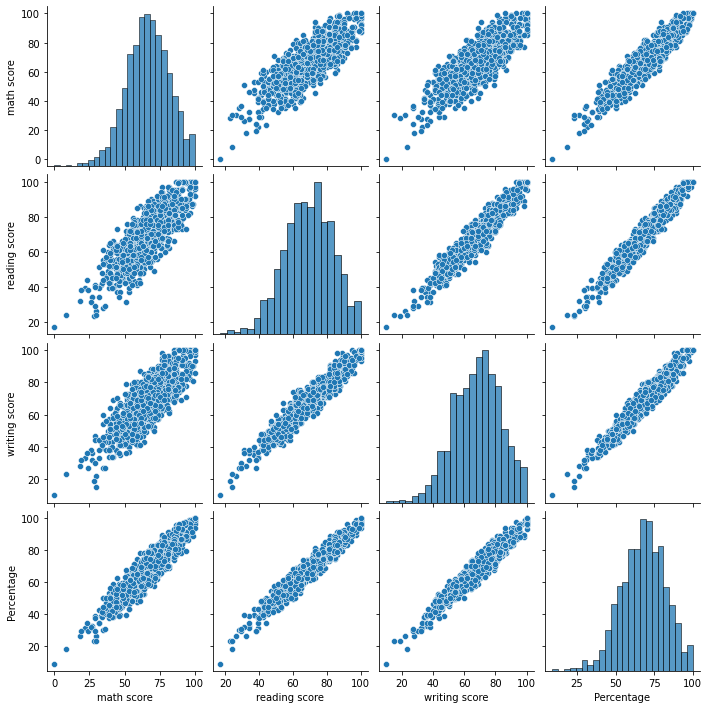

In [44]:
sns.pairplot(dataset)

<AxesSubplot:>

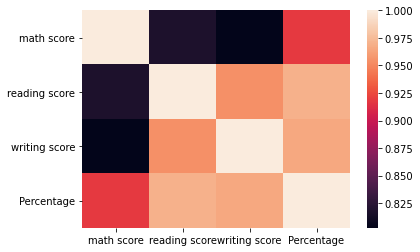

In [45]:
sns.heatmap(data = dataset.corr())

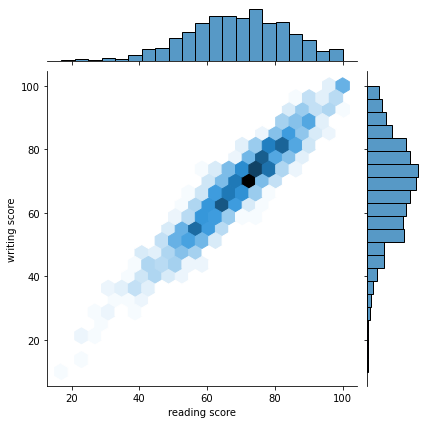

In [46]:
sns.jointplot(x='reading score', y='writing score', data=dataset, kind='hex')

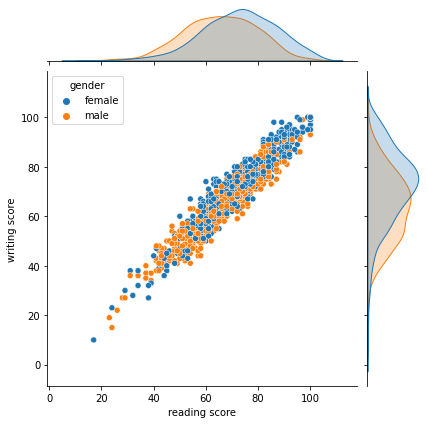

In [51]:
sns.jointplot(x='reading score', y='writing score', data=dataset, hue='gender')

In [55]:
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Percentage'],
      dtype='object')

In [97]:
y = dataset['Percentage']

In [98]:
X = dataset[['math score', 'reading score', 'writing score']]

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size=0.3,random_state=101)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lm = LinearRegression()

In [103]:
lm.fit(X_train, y_train)

LinearRegression()

In [104]:
lm.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [105]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

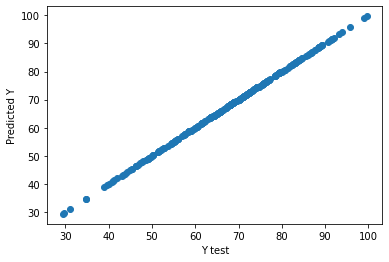

In [106]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [107]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.0279184910662783e-14
MSE: 1.486845034160563e-28
RMSE: 1.2193625523856975e-14


In [108]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
math score,0.333333
reading score,0.333333
writing score,0.333333


In [109]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : prediction})
result

,Actual,Predicted
545,80.333333,80.333333
298,45.333333,45.333333
109,68.666667,68.666667
837,78.666667,78.666667
194,79.333333,79.333333
...,...,...
847,56.000000,56.000000
682,57.000000,57.000000
884,52.000000,52.000000
325,88.666667,88.666667
